In [4]:
from sympy import *
from sympy.plotting import plot

# Calculo de derivadas usando la funcion diff de sympy

Primero definimos que variables van a ser interpretadas como tales por sympy, y luego calculamos la derivada de $t^2$

In [18]:
t = symbols('t')
diff(t**2,t)

2*t

Podemos definir nuestra funcion $x(t)$ y luego derivarla, incluso darle un nombre nuevo a la funcion derivada (por ejemplo dx). 

In [19]:
x = t**2
dx = diff(x,t)
print('la funcion original: ' + str(x))
print('la funcion derivada: ' + str(dx))

la funcion original: t**2
la funcion derivada: 2*t


Si queremos evaluar la funcion o la derivada en un valor particular tenemos que usar subs

In [20]:
print(x.subs(t,3))
print(dx.subs(t,3))

9
6


Podemos probar aca derivar diferentes funciones de t

In [24]:
x = exp(3*t)
dx = diff(x,t)
print(dx)

3*exp(3*t)


Podemos graficar una funcion y su derivada usando plot (de sympy no confundir con la de matplotlib)

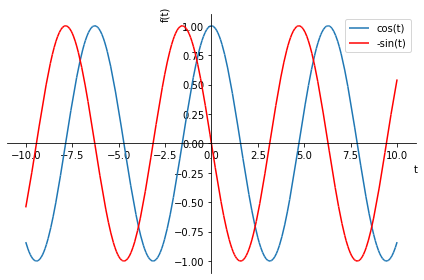

In [25]:
x = cos(t)
dx = diff(x,t)
p1 = plot(x,show=False,legend=x)
p2 = plot(dx,line_color='red',show=False,legend=diff(x,t))
p1.append(p2[0])
p1.show()

Escribimos una funcion para graficar una funcion y su derivada en un punto, como la recta tangente. Notar que en lugar de x llamamos f de forma general a esa funcion que pasamos como argumento pero la variable de la funcion sigue siendo t que es la unica definida como tal al principio

In [26]:
def plotdiff(f, t, t0, tmin, tmax):
  '''Grafica la derivada de f(t) en el punto t=t0
  como recta con pendiente igual a la derivada en ese punto
  '''
  p1 = plot(f, (t,tmin,tmax), legend=f, show=False)
  df = diff(f,t)
  s = f.subs(t,t0) + df.subs(t,t0)*(t-t0)
  p2 = plot(s,(t,tmin,tmax), line_color = 'red', legend=s,show=False)
  p1.append(p2[0])
  return p1

Como ejemplo graficamos la derivada de $e^t$ en el punto t=1

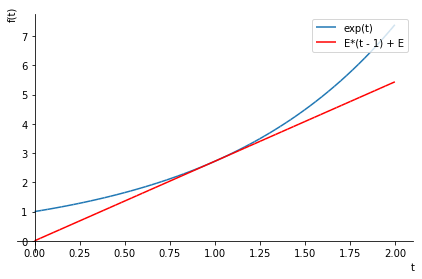

In [31]:
pp = plotdiff(exp(t),t,1,0,2)
pp.show()